<b>TMDB Movies Recommendation

The dataset used in this project is sourced from The Movie Database (TMDB) and contains information about the top 10,000 movies. It includes important attributes such as movie ratings, popularity scores, vote counts, language, and release details. Each row represents an individual movie, and each column describes a specific characteristic of that movie. This dataset provides a real-world basis for analyzing movie performance and is well-suited for applying machine learning techniqu

## Import Libraries

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# SVM Models
from sklearn.svm import SVC

# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
#for evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

from sklearn.model_selection import train_test_split


#models
#for regressioin algorithms
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor



from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#for classification algorithm,s
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
#from sklearn.utils import class_weight
#from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import tree


In [3]:
df=pd.read_csv(r"C:\Users\Pc\Desktop\ML PROJECT\top10K-TMDB-movies.csv")
df

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811
...,...,...,...,...,...,...,...,...,...
9995,10196,The Last Airbender,"Action,Adventure,Fantasy",en,"The story follows the adventures of Aang, a yo...",98.322,2010-06-30,4.7,3347
9996,331446,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventure",en,The sharks take bite out of the East Coast whe...,12.490,2015-07-22,4.7,417
9997,13995,Captain America,"Action,Science Fiction,War",en,"During World War II, a brave, patriotic Americ...",18.333,1990-12-14,4.6,332
9998,2312,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",en,A man named Farmer sets out to rescue his kidn...,15.159,2007-11-29,4.7,668


# BASIC UNDERSTANDING

In [4]:
df['title'].nunique()

9661

In [5]:
df.shape

(10000, 9)

In [6]:
df.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [7]:
df.tail()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
9995,10196,The Last Airbender,"Action,Adventure,Fantasy",en,"The story follows the adventures of Aang, a yo...",98.322,2010-06-30,4.7,3347
9996,331446,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventure",en,The sharks take bite out of the East Coast whe...,12.490,2015-07-22,4.7,417
9997,13995,Captain America,"Action,Science Fiction,War",en,"During World War II, a brave, patriotic Americ...",18.333,1990-12-14,4.6,332
9998,2312,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",en,A man named Farmer sets out to rescue his kidn...,15.159,2007-11-29,4.7,668
9999,455957,Domino,"Thriller,Action,Crime",en,Seeking justice for his partner’s murder by an...,16.482,2019-05-31,4.6,221


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB


In [9]:
df.sample()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
5074,13155,Return to Oz,"Adventure,Family,Fantasy",en,"Dorothy, saved from a psychiatric experiment b...",11.459,1985-06-21,6.6,680


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

In [12]:
df["overview"].mode()[0]


'"Loro", in two parts, is a period movie that chronicles, as a fiction story, events likely happened in Italy (or even made up) between 2006 and 2010.  "Loro" wants to suggest in portraits and glimps, through a composite constellation of characters, a moment in history, now definitively ended, which can be described in a very summary picture of the events as amoral, decadent but extraordinarily alive.  Additionally, "Loro" wishes to tell the story of some Italians, fresh and ancient people at the same time: souls from a modern imaginary Purgatory who, moved by heterogeneous intents like ambition, admiration, affection, curiosity, personal interests, establish to try and orbit around the walking Paradise that is the man named Silvio Berlusconi.'

In [13]:
df["overview"]=df["overview"].fillna(df["overview"].mode()[0])

# temperory

In [14]:
df['genre'] = df['genre'].fillna('').astype(str)


In [15]:
df['genre_list'] = df['genre'].apply(
    lambda x: x.split(',') if x.strip() != '' else []
)


In [16]:
df['genre_list']

0                                          [Drama, Crime]
1                                [Comedy, Drama, Romance]
2                                          [Drama, Crime]
3                                   [Drama, History, War]
4                                          [Drama, Crime]
                              ...                        
9995                         [Action, Adventure, Fantasy]
9996    [Action, TV Movie, Science Fiction, Comedy, Ad...
9997                       [Action, Science Fiction, War]
9998                  [Adventure, Fantasy, Action, Drama]
9999                            [Thriller, Action, Crime]
Name: genre_list, Length: 10000, dtype: object

In [17]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['genre_list'])

genre_encoded


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]])

In [18]:
genre_df = pd.DataFrame(
    genre_encoded,
    columns=mlb.classes_,
    index=df.index
)

genre_df

,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9996,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0
9997,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9998,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [19]:


df = pd.concat([df, genre_df], axis=1)
# 

In [20]:
df.drop(columns=['genre', 'genre_list'], inplace=True)

In [21]:
df

,id,title,original_language,overview,popularity,release_date,vote_average,vote_count,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,278,The Shawshank Redemption,en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19404,Dilwale Dulhania Le Jayenge,hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731,0,0,...,0,0,0,0,1,0,0,0,0,0
2,238,The Godfather,en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280,0,0,...,0,0,0,0,0,0,0,0,0,0
3,424,Schindler's List,en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959,0,0,...,1,0,0,0,0,0,0,0,1,0
4,240,The Godfather: Part II,en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10196,The Last Airbender,en,"The story follows the adventures of Aang, a yo...",98.322,2010-06-30,4.7,3347,1,1,...,0,0,0,0,0,0,0,0,0,0
9996,331446,Sharknado 3: Oh Hell No!,en,The sharks take bite out of the East Coast whe...,12.490,2015-07-22,4.7,417,1,1,...,0,0,0,0,0,1,1,0,0,0
9997,13995,Captain America,en,"During World War II, a brave, patriotic Americ...",18.333,1990-12-14,4.6,332,1,0,...,0,0,0,0,0,1,0,0,1,0
9998,2312,In the Name of the King: A Dungeon Siege Tale,en,A man named Farmer sets out to rescue his kidn...,15.159,2007-11-29,4.7,668,1,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df.head()

,id,title,original_language,overview,popularity,release_date,vote_average,vote_count,Action,Adventure,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,278,The Shawshank Redemption,en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19404,Dilwale Dulhania Le Jayenge,hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731,0,0,...,0,0,0,0,1,0,0,0,0,0
2,238,The Godfather,en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280,0,0,...,0,0,0,0,0,0,0,0,0,0
3,424,Schindler's List,en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959,0,0,...,1,0,0,0,0,0,0,0,1,0
4,240,The Godfather: Part II,en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811,0,0,...,0,0,0,0,0,0,0,0,0,0


# actual

In [23]:
#df["genre"]=df["genre"].fillna(df["genre"].mode()[0])

In [24]:
df.isnull().sum()

id                   0
title                0
original_language    0
overview             0
popularity           0
release_date         0
vote_average         0
vote_count           0
Action               0
Adventure            0
Animation            0
Comedy               0
Crime                0
Drama                0
Family               0
Fantasy              0
History              0
Horror               0
Music                0
Mystery              0
Romance              0
Science Fiction      0
TV Movie             0
Thriller             0
War                  0
Western              0
dtype: int64

In [25]:
df.describe()

,id,popularity,vote_average,vote_count,Action,Adventure,Animation,Comedy,Crime,Drama,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,161243.505000,34.697267,6.621150,1547.309400,0.221300,0.155800,0.089600,0.371400,0.145300,0.454200,...,0.047500,0.136600,0.028900,0.086500,0.168000,0.113900,0.013300,0.266300,0.031300,0.014400
std,211422.046043,211.684175,0.766231,2648.295789,0.415143,0.362684,0.285622,0.483203,0.352421,0.497923,...,0.212716,0.343442,0.167534,0.281115,0.373885,0.317706,0.114562,0.442045,0.174136,0.119139
min,5.000000,0.600000,4.600000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10127.750000,9.154750,6.100000,315.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30002.500000,13.637500,6.600000,583.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,310133.500000,25.651250,7.200000,1460.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,934761.000000,10436.917000,8.700000,31917.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# EDA(exploratory data analysis)

# feature engineering

In [26]:
from typing import List

def display_cols_value_counts(col_names:list[str]):
    for  col_name in col_names:
        print('-'*30)
        print(f"column: {col_name}")
        print('-'*30)
        print("the datatype:",df[col_name].dtype)
        print("the number of null values:",df[col_name].isnull().sum())
        print(df[col_name].describe())
        print(" ")

        # check if the unique  values in the column are less than 10 to display frequent 
        if df[col_name].nunique()<10:
            print("there are ",df[col_name].nunique(),"unique values")
            print(df[col_name].value_counts())

        else:
            print("(frequency table does not displayd ,there are ",df[col_name].nunique(),"unique values") 
            print('')
display_cols_value_counts(df.columns)            


------------------------------
column: id
------------------------------
the datatype: int64
the number of null values: 0
count     10000.000000
mean     161243.505000
std      211422.046043
min           5.000000
25%       10127.750000
50%       30002.500000
75%      310133.500000
max      934761.000000
Name: id, dtype: float64
 
(frequency table does not displayd ,there are  10000 unique values

------------------------------
column: title
------------------------------
the datatype: object
the number of null values: 0
count                    10000
unique                    9661
top       Beauty and the Beast
freq                         4
Name: title, dtype: object
 
(frequency table does not displayd ,there are  9661 unique values

------------------------------
column: original_language
------------------------------
the datatype: object
the number of null values: 0
count     10000
unique       43
top          en
freq       7810
Name: original_language, dtype: object
 
(frequency

In [27]:
df.drop(columns=["id"],inplace=True)

In [28]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols


Index(['popularity', 'vote_average', 'vote_count'], dtype='object')

In [29]:
df.columns

Index(['title', 'original_language', 'overview', 'popularity', 'release_date',
       'vote_average', 'vote_count', 'Action', 'Adventure', 'Animation',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western'],
      dtype='object')

In [30]:
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year


In [31]:
df.drop(["release_date"],axis=1,inplace=True)

In [32]:
df.columns

Index(['title', 'original_language', 'overview', 'popularity', 'vote_average',
       'vote_count', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'release_year'],
      dtype='object')

In [33]:
df.head()

,title,original_language,overview,popularity,vote_average,vote_count,Action,Adventure,Animation,Comedy,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,release_year
0,The Shawshank Redemption,en,Framed in the 1940s for the double murder of h...,94.075,8.7,21862,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1994
1,Dilwale Dulhania Le Jayenge,hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,8.7,3731,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1995
2,The Godfather,en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,8.7,16280,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1972
3,Schindler's List,en,The true story of how businessman Oskar Schind...,44.761,8.6,12959,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1993
4,The Godfather: Part II,en,In the continuing saga of the Corleone crime f...,57.749,8.6,9811,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1974


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              10000 non-null  object 
 1   original_language  10000 non-null  object 
 2   overview           10000 non-null  object 
 3   popularity         10000 non-null  float64
 4   vote_average       10000 non-null  float64
 5   vote_count         10000 non-null  int64  
 6   Action             10000 non-null  int32  
 7   Adventure          10000 non-null  int32  
 8   Animation          10000 non-null  int32  
 9   Comedy             10000 non-null  int32  
 10  Crime              10000 non-null  int32  
 11  Drama              10000 non-null  int32  
 12  Family             10000 non-null  int32  
 13  Fantasy            10000 non-null  int32  
 14  History            10000 non-null  int32  
 15  Horror             10000 non-null  int32  
 16  Music              1000

that War and History genres have the highest average ratings, slightly above 7.0. This indicates that movies belonging to these genres are generally rated higher by audiences

movies with highest rating

In [35]:
df.sort_values(by='vote_average', ascending=False)[
    ['title', 'vote_average', 'vote_count',"popularity"]
].head(10)


,title,vote_average,vote_count,popularity
0,The Shawshank Redemption,8.7,21862,94.075
2,The Godfather,8.7,16280,90.585
1,Dilwale Dulhania Le Jayenge,8.7,3731,25.408
3,Schindler's List,8.6,12959,44.761
4,The Godfather: Part II,8.6,9811,57.749
5,Impossible Things,8.6,255,14.358
16,"The Good, the Bad and the Ugly",8.5,6747,47.730
26,Once Upon a Time in America,8.5,4241,25.789
25,Life Is Beautiful,8.5,11179,55.527
24,Violet Evergarden: The Movie,8.5,251,23.933


movies have enough votes

In [36]:
high_rated_movies = df[
    df['vote_count'] >= 1000
].sort_values(by='vote_average', ascending=False)[
    ['title', 'vote_average', 'vote_count','release_year']
].head(10)

high_rated_movies 


,title,vote_average,vote_count,release_year
0,The Shawshank Redemption,8.7,21862,1994
2,The Godfather,8.7,16280,1972
1,Dilwale Dulhania Le Jayenge,8.7,3731,1995
3,Schindler's List,8.6,12959,1993
4,The Godfather: Part II,8.6,9811,1974
16,"The Good, the Bad and the Ugly",8.5,6747,1966
26,Once Upon a Time in America,8.5,4241,1984
25,Life Is Beautiful,8.5,11179,1997
23,GoodFellas,8.5,10294,1990
22,Seven Samurai,8.5,2725,1954


In [37]:
top_5_movies = high_rated_movies.head(5).set_index('title')


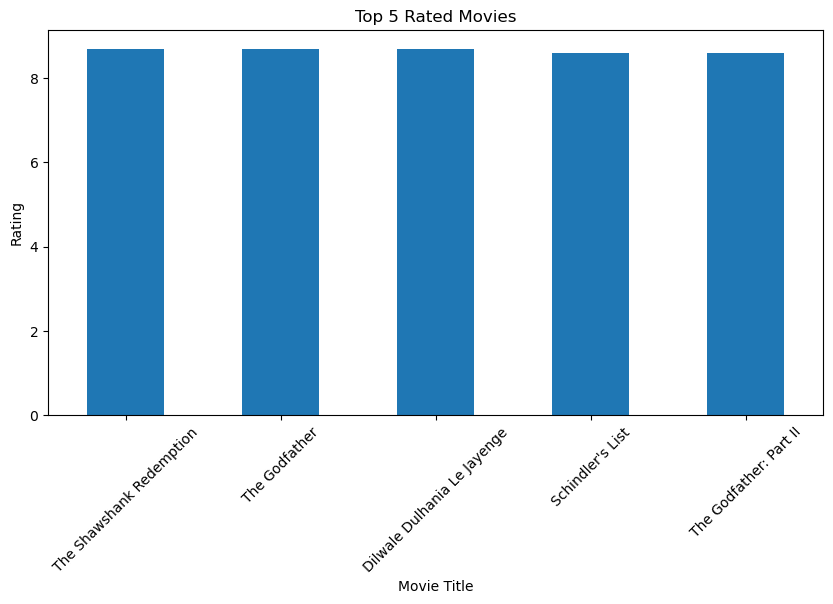

In [38]:
plt.figure(figsize=(10,5))
top_5_movies['vote_average'].plot(kind='bar')
plt.title("Top 5 Rated Movies")
plt.ylabel("Rating")
plt.xlabel("Movie Title")
plt.xticks(rotation=45)
plt.show()


The plot shows the top 5 highest-rated movies based on average user ratings.

The Shawshank Redemption has the highest rating, making it the most critically acclaimed movie among the top five.

The Godfather and The Godfather: Part II also have very high ratings, showing strong audience appreciation for this movie series.

Schindler’s List and Dilwale Dulhania Le Jayenge are similarly highly rated, indicating global as well as regional audience preference.

All five movies have ratings above 8.5, which suggests they are universally well-received and considered classics.

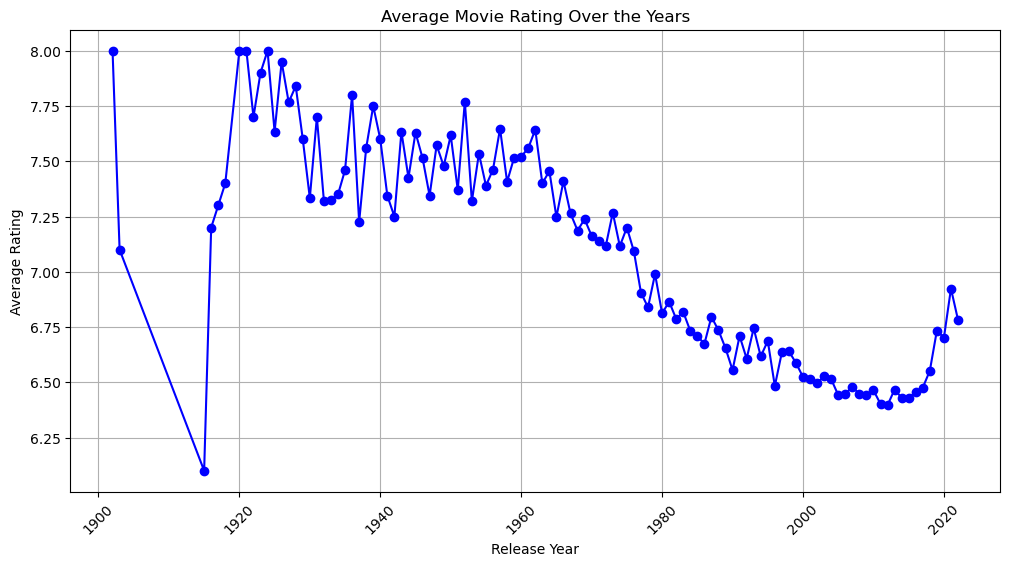

In [39]:
import matplotlib.pyplot as plt

# Group by release year and calculate average rating
year_rating = df.groupby('release_year')['vote_average'].mean()

# Plot line chart
plt.figure(figsize=(12,6))
plt.plot(year_rating.index, year_rating.values, marker='o', color='blue')
plt.title("Average Movie Rating Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [40]:
df.columns

Index(['title', 'original_language', 'overview', 'popularity', 'vote_average',
       'vote_count', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'release_year'],
      dtype='object')

genere distribution

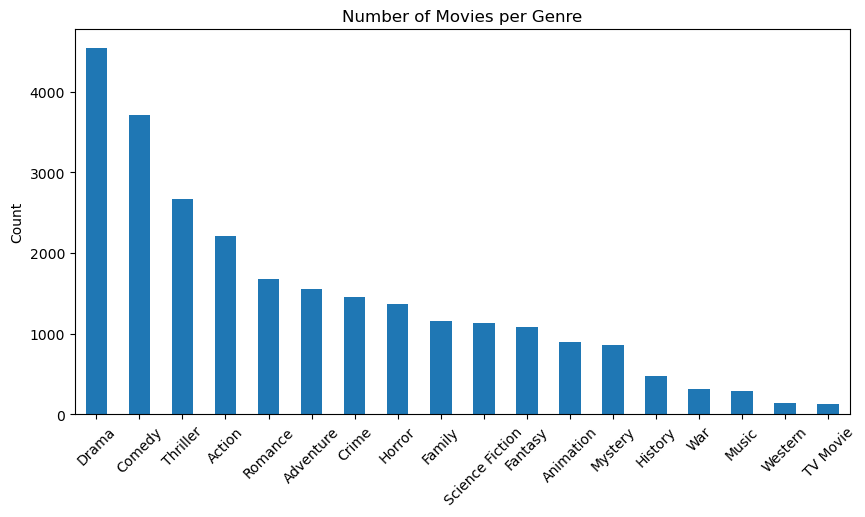

In [41]:
genre_counts = df[mlb.classes_].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
genre_counts.plot(kind='bar')
plt.title("Number of Movies per Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


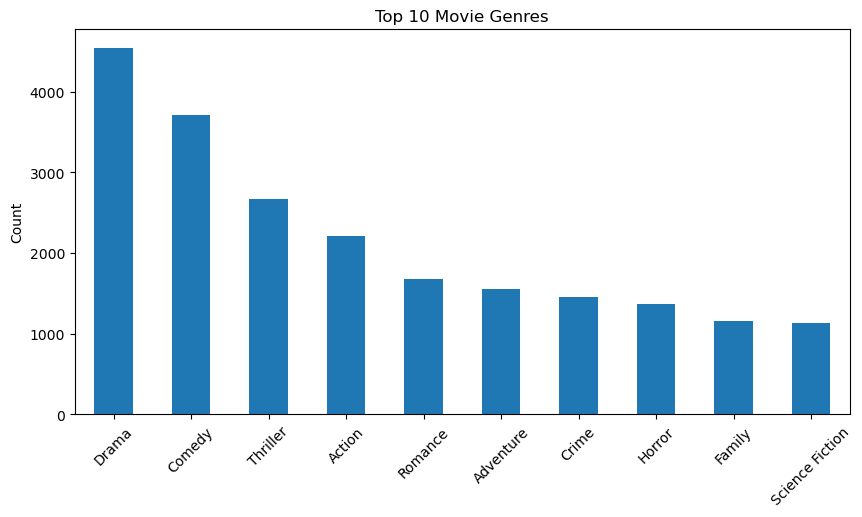

In [42]:
top_10_genres = genre_counts.head(10)

plt.figure(figsize=(10,5))
top_10_genres.plot(kind='bar')
plt.title("Top 10 Movie Genres")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


drama apear most

In [43]:
mlb.classes_

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War',
       'Western'], dtype=object)

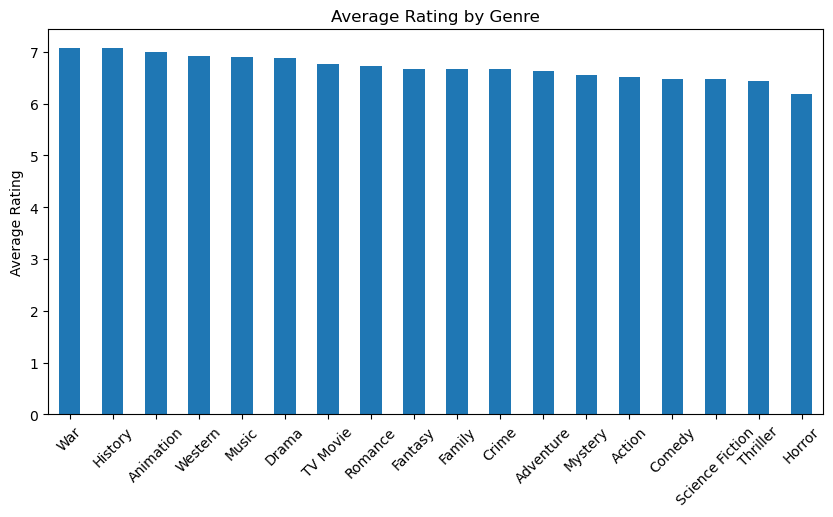

In [44]:
genre_avg_rating = {}

for genre in mlb.classes_:
    genre_avg_rating[genre] = df.loc[df[genre] == 1, 'vote_average'].mean()

genre_avg_rating = pd.Series(genre_avg_rating).sort_values(ascending=False)

plt.figure(figsize=(10,5))
genre_avg_rating.plot(kind='bar')
plt.title("Average Rating by Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


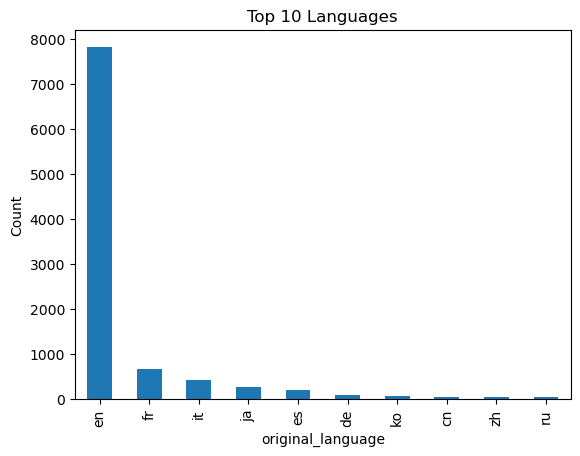

In [45]:
plt.figure()
df['original_language'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Languages")
plt.ylabel("Count")
plt.show()


In [46]:
df["original_language"].value_counts()

original_language
en    7810
fr     680
it     434
ja     275
es     195
de     104
ko      76
cn      54
zh      54
ru      47
pt      43
hi      39
sv      36
da      29
no      18
pl      16
nl      12
tr      11
th      10
fa       8
hu       6
id       6
fi       4
el       4
is       3
sr       3
cs       3
eu       2
ro       2
te       2
ar       2
nb       1
af       1
he       1
ab       1
uk       1
bn       1
la       1
ml       1
bs       1
et       1
sh       1
xx       1
Name: count, dtype: int64

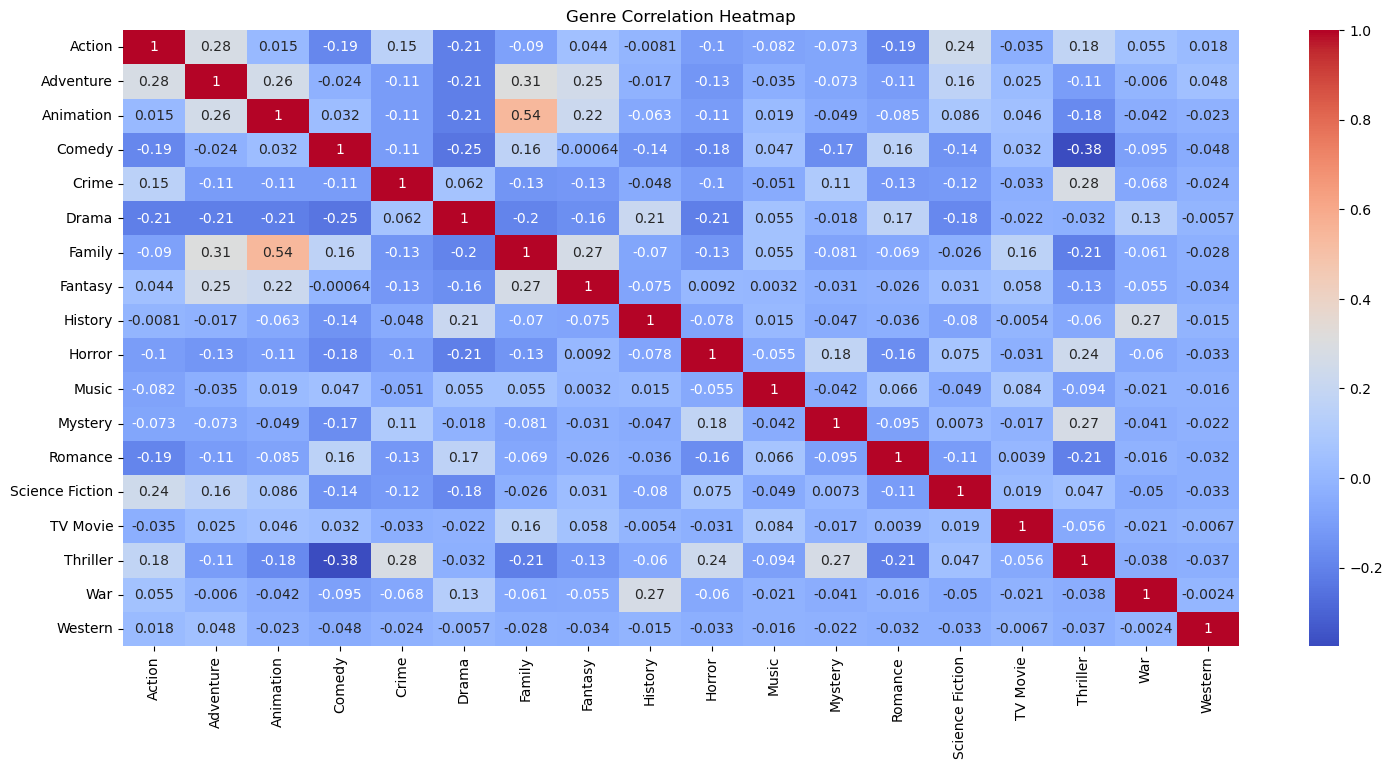

In [47]:
import seaborn as sns

plt.figure(figsize=(18,8))
sns.heatmap(df[mlb.classes_].corr(),annot=True, cmap='coolwarm')
plt.title("Genre Correlation Heatmap")
plt.show()


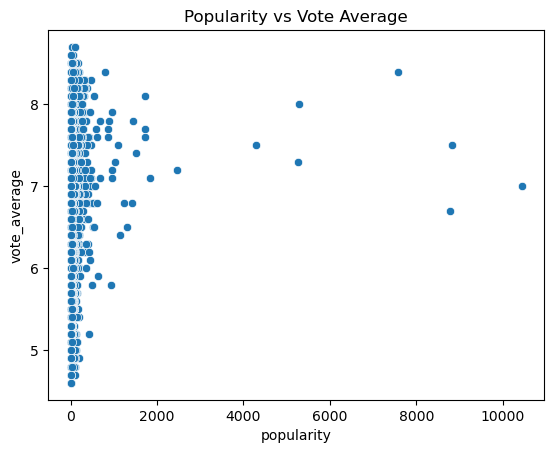

In [48]:
plt.figure()
sns.scatterplot(x='popularity', y='vote_average', data=df)
plt.title("Popularity vs Vote Average")
plt.show()


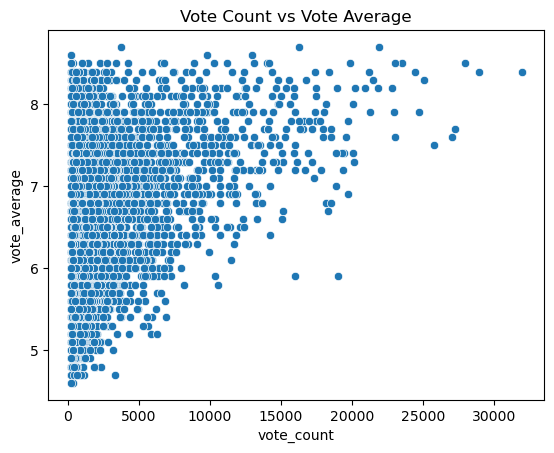

In [49]:
plt.figure()
sns.scatterplot(x='vote_count', y='vote_average', data=df)
plt.title("Vote Count vs Vote Average")
plt.show()


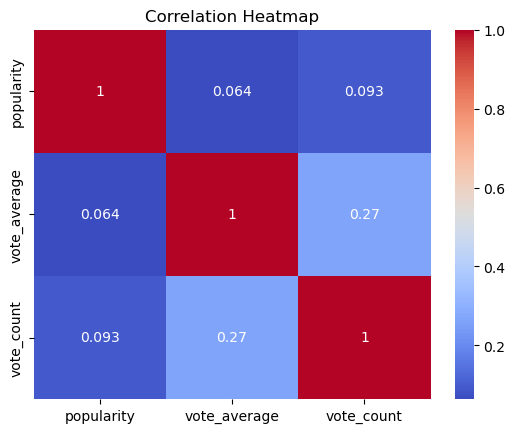

In [50]:
plt.figure()
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [51]:
import seaborn as sns

In [52]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

# select numerical columns only
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# IMPORTANT: drop target-related columns
num_cols = num_cols.drop(['Rating'], errors='ignore')

X = df[num_cols].dropna()


In [53]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

vif_data


,Feature,VIF
0,popularity,1.036696
1,vote_average,1.399732
2,vote_count,1.396339


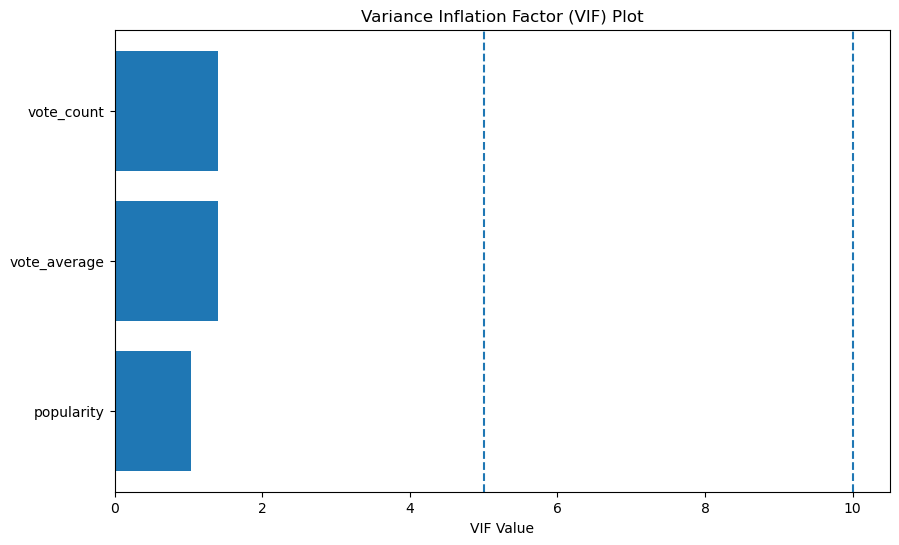

In [54]:
plt.figure(figsize=(10, 6))
plt.barh(vif_data['Feature'], vif_data['VIF'])
plt.axvline(x=5, linestyle='--')   # warning level
plt.axvline(x=10, linestyle='--')  # critical level
plt.xlabel('VIF Value')
plt.title('Variance Inflation Factor (VIF) Plot')
plt.show()


top rated movies

In [55]:
df.sort_values(by='vote_average', ascending=False)[
    ['title', 'vote_average', 'vote_count']
].head(10)


,title,vote_average,vote_count
0,The Shawshank Redemption,8.7,21862
2,The Godfather,8.7,16280
1,Dilwale Dulhania Le Jayenge,8.7,3731
3,Schindler's List,8.6,12959
4,The Godfather: Part II,8.6,9811
5,Impossible Things,8.6,255
16,"The Good, the Bad and the Ugly",8.5,6747
26,Once Upon a Time in America,8.5,4241
25,Life Is Beautiful,8.5,11179
24,Violet Evergarden: The Movie,8.5,251


most popular movies

In [56]:
df.sort_values(by='popularity', ascending=False)[
    ['title', 'popularity']
].head(10)


,title,popularity
3066,Jurassic World Dominion,10436.917
1337,Minions: The Rise of Gru,8821.801
4522,Thor: Love and Thunder,8772.151
61,Top Gun: Maverick,7567.017
388,The Black Phone,5278.336
1990,Lightyear,5255.930
1313,Doctor Strange in the Multiverse of Madness,4289.605
2815,The Princess,2456.150
3103,The Exorcism of God,1837.940
948,The Sea Beast,1723.363


In [57]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()                     # lowercase
    text = re.sub(r'[^\w\s]', '', text)     # remove punctuation & commas
    text = re.sub(r'\d+', '', text)         # remove numbers
    text = text.split()                     # tokenize
    text = [word for word in text if word not in stop_words]  # remove stopwords
    return " ".join(text)


In [59]:
df['overview'] = df['overview'].fillna('')  # fill missing text
df['overview_cleaned'] = df['overview'].apply(clean_text)


In [60]:
df[['overview', 'overview_cleaned']].head()


,overview,overview_cleaned
0,Framed in the 1940s for the double murder of h...,framed double murder wife lover upstanding ban...
1,"Raj is a rich, carefree, happy-go-lucky second...",raj rich carefree happygolucky second generati...
2,"Spanning the years 1945 to 1955, a chronicle o...",spanning years chronicle fictional italianamer...
3,The true story of how businessman Oskar Schind...,true story businessman oskar schindler saved t...
4,In the continuing saga of the Corleone crime f...,continuing saga corleone crime family young vi...


In [61]:
df.drop(["overview"],axis=1,inplace=True)

In [62]:
df.columns

Index(['title', 'original_language', 'popularity', 'vote_average',
       'vote_count', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'release_year', 'overview_cleaned'],
      dtype='object')

In [63]:
cat=df.select_dtypes(include=["object"]).columns.tolist()
print(cat)

['title', 'original_language', 'overview_cleaned']


# ordinal

In [64]:
def categorize_rating(rating):
    if rating >= 7.5:
        return "High"
    elif rating >= 5.0:
        return "Medium"
    else:
        return "Low"

df["vote_category"] = df["vote_average"].apply(categorize_rating)


In [65]:
df["vote_category"]=df["vote_category"].map({"High":0,"Low":1,"Medium":2})

In [66]:
language_mean = df.groupby('original_language')['vote_average'].mean()

df['original_language_encoded'] = df['original_language'].map(language_mean)


In [67]:
df.drop(columns=['original_language'], inplace=True)


In [68]:
df.tail()

,title,popularity,vote_average,vote_count,Action,Adventure,Animation,Comedy,Crime,Drama,...,Romance,Science Fiction,TV Movie,Thriller,War,Western,release_year,overview_cleaned,vote_category,original_language_encoded
9995,The Last Airbender,98.322,4.7,3347,1,1,0,0,0,0,...,0,0,0,0,0,0,2010,story follows adventures aang young successor ...,1,6.544469
9996,Sharknado 3: Oh Hell No!,12.490,4.7,417,1,1,0,1,0,0,...,0,1,1,0,0,0,2015,sharks take bite east coast sharknado hits was...,1,6.544469
9997,Captain America,18.333,4.6,332,1,0,0,0,0,0,...,0,1,0,0,1,0,1990,world war ii brave patriotic american soldier ...,1,6.544469
9998,In the Name of the King: A Dungeon Siege Tale,15.159,4.7,668,1,1,0,0,0,1,...,0,0,0,0,0,0,2007,man named farmer sets rescue kidnapped wife av...,1,6.544469
9999,Domino,16.482,4.6,221,1,0,0,0,1,0,...,0,0,0,1,0,0,2019,seeking justice partners murder isis member co...,1,6.544469


In [69]:
df.drop("vote_average",axis=1,inplace=True)

# DATA TRANSFORMATION

# HANDLE SKEW DATA

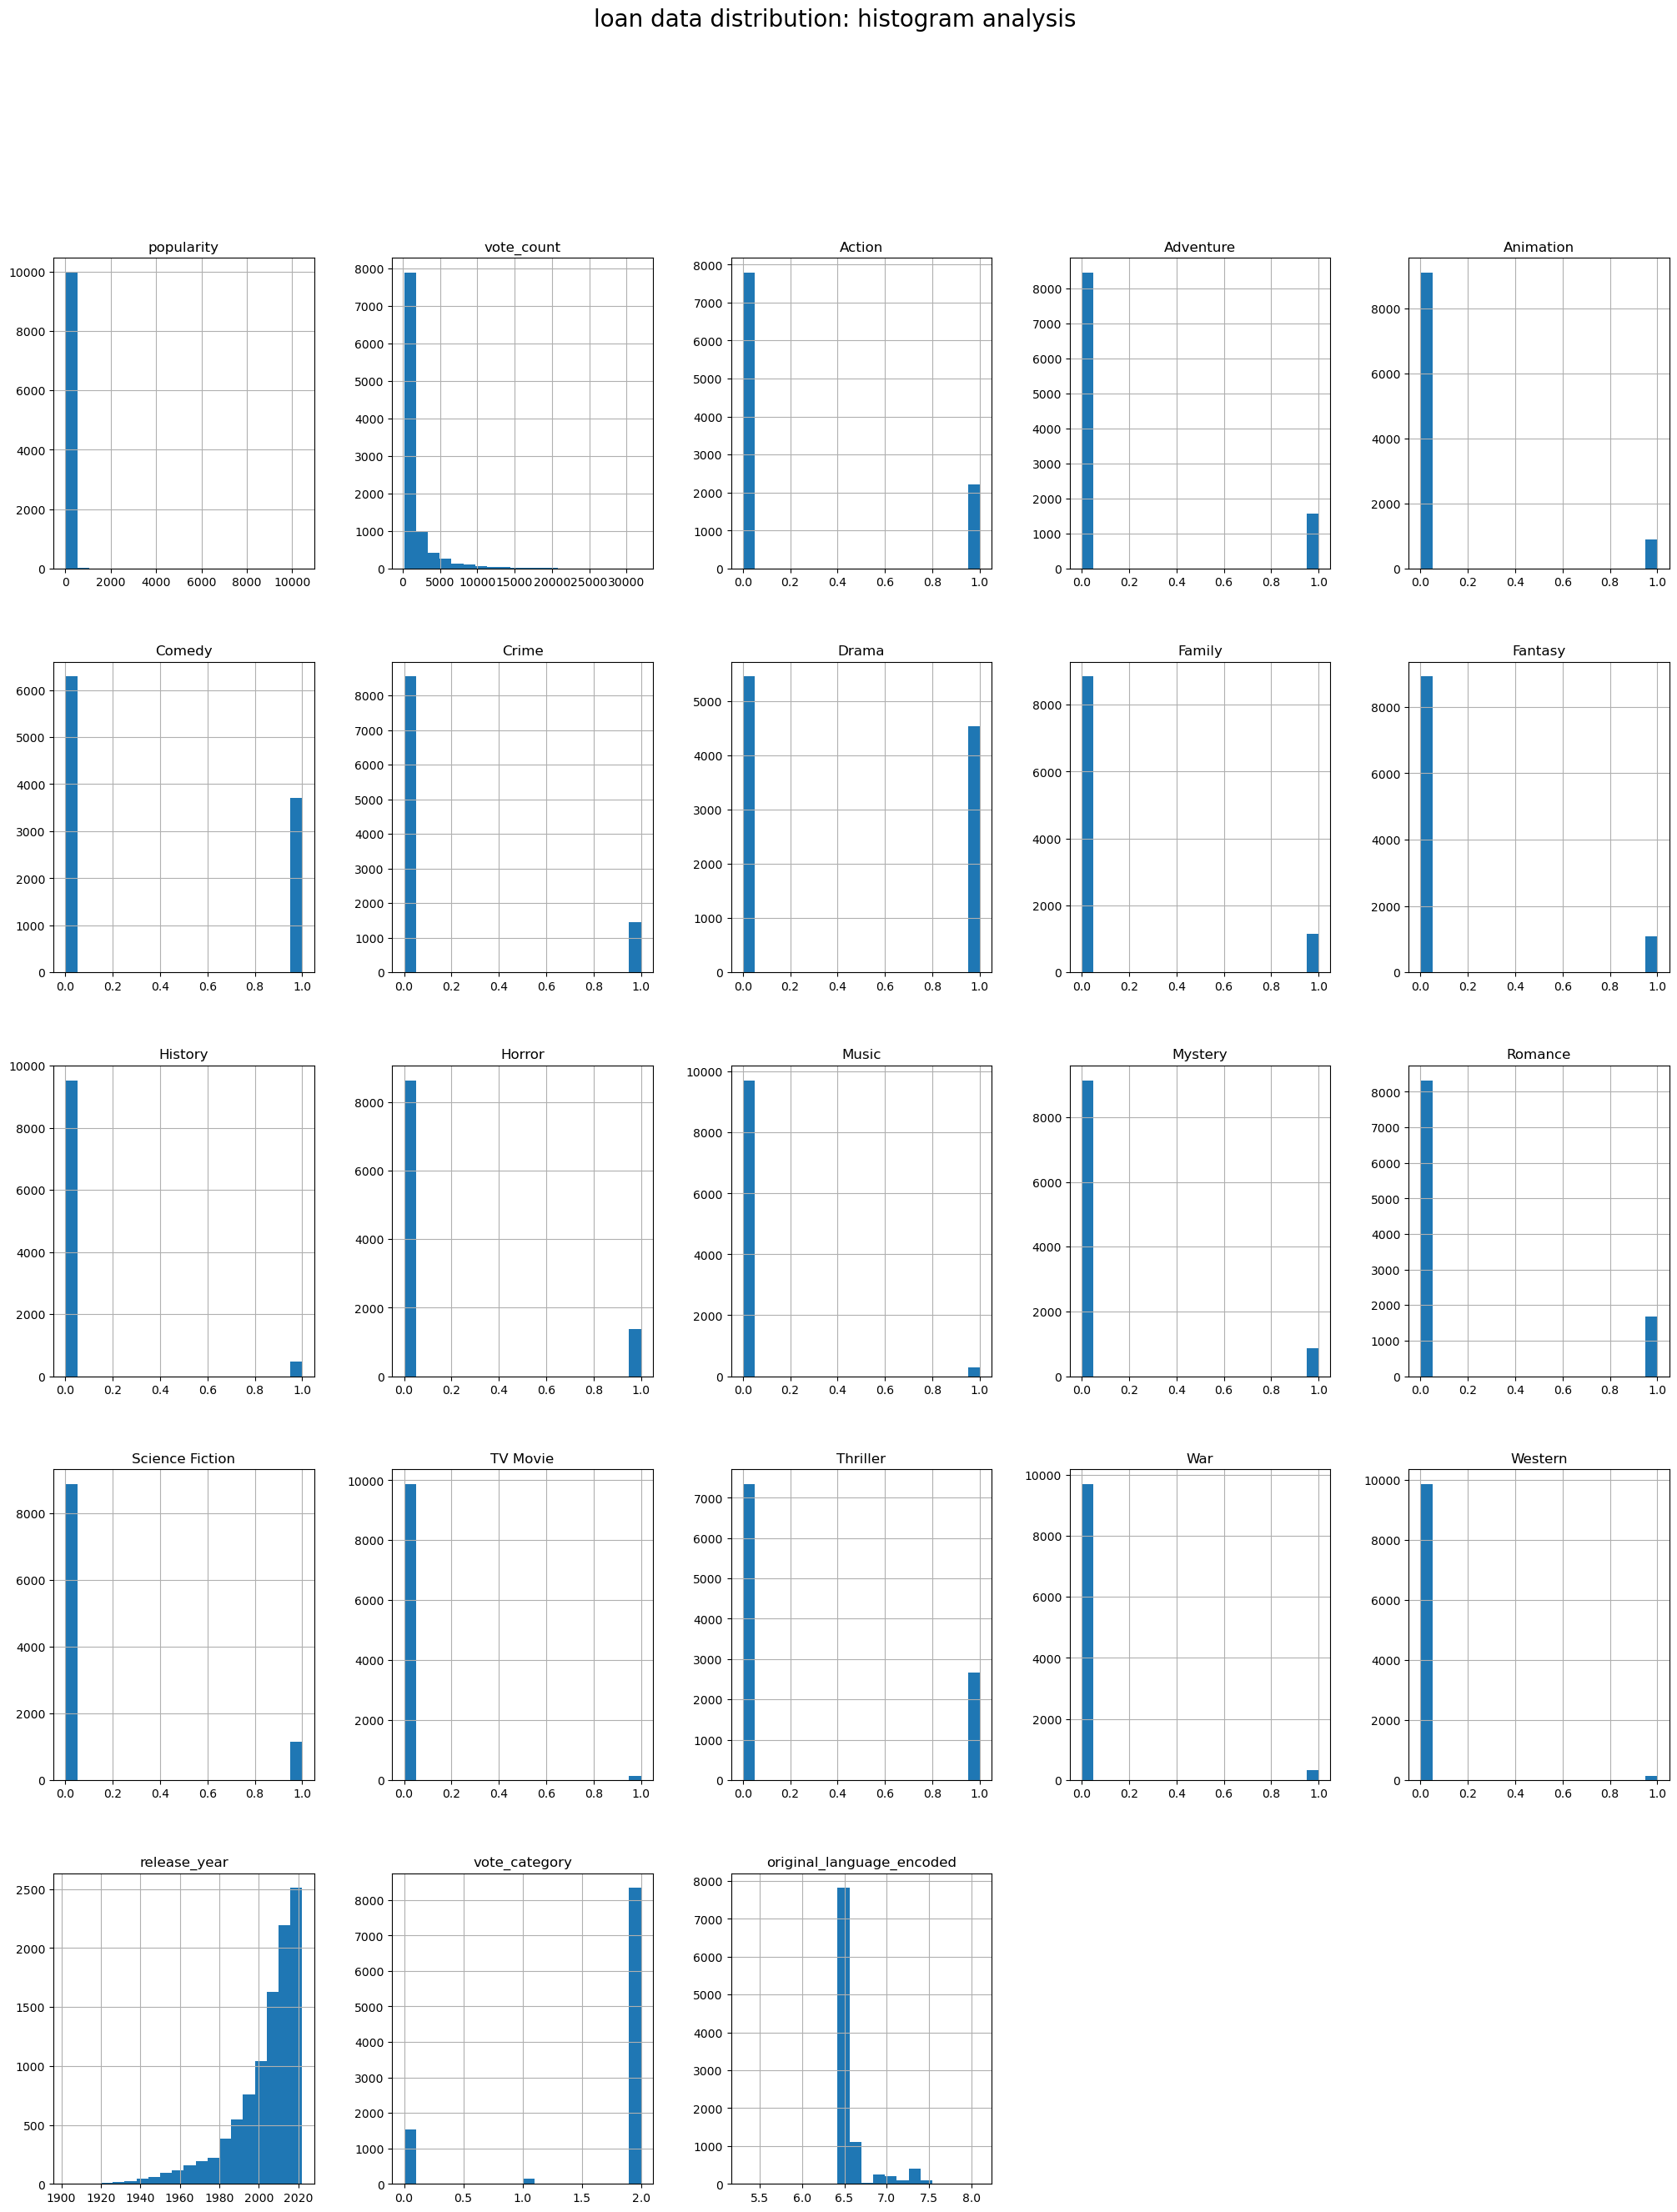

In [70]:
df.hist (bins=20,figsize=(25,30))
plt.suptitle("loan data distribution: histogram analysis",fontsize=20)
plt.show()

In [71]:
import numpy as np

df['popularity_log'] = np.log1p(df['popularity'])



In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['release_year_scaled'] = scaler.fit_transform(df[['release_year']])
df.drop(columns=['release_year'], inplace=True)


In [73]:
# create a copy of the  original data for comparison
df_copy=df.copy()
# log transformation of skewed columns (eg,annulincom.loanamount)
df['popularity']=np.log1p(df['popularity'])#log(1+x) to hnadle 


In [74]:
import matplotlib.pyplot as plt

In [75]:
df['popularity']

0       4.554666
1       3.273667
2       4.517268
3       3.823432
4       4.073274
          ...   
9995    4.598367
9996    2.601949
9997    2.961813
9998    2.782477
9999    2.861172
Name: popularity, Length: 10000, dtype: float64

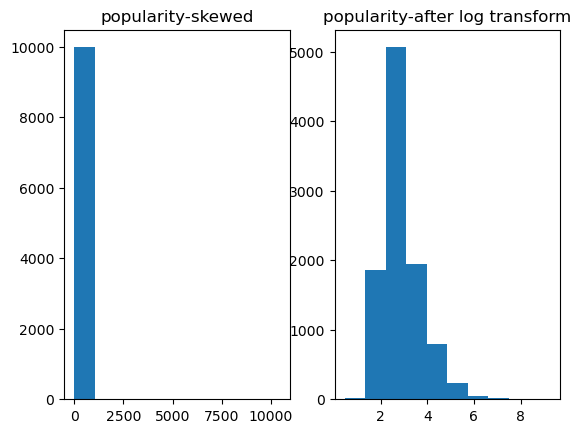

In [76]:
plt.Figure(figsize=(14,7))
# 
ax1=plt.subplot(1,2,1)
cp=plt.hist(df_copy['popularity'])

plt.title("popularity-skewed")
# 
ax2=plt.subplot(1,2,2)
plt.hist(df['popularity'])
plt.title("popularity-after log transform")
plt.show()

In [77]:
df

,title,popularity,vote_count,Action,Adventure,Animation,Comedy,Crime,Drama,Family,...,Science Fiction,TV Movie,Thriller,War,Western,overview_cleaned,vote_category,original_language_encoded,popularity_log,release_year_scaled
0,The Shawshank Redemption,4.554666,21862,0,0,0,0,1,1,0,...,0,0,0,0,0,framed double murder wife lover upstanding ban...,0,6.544469,4.554666,-0.546665
1,Dilwale Dulhania Le Jayenge,3.273667,3731,0,0,0,1,0,1,0,...,0,0,0,0,0,raj rich carefree happygolucky second generati...,0,7.330769,3.273667,-0.488059
2,The Godfather,4.517268,16280,0,0,0,0,1,1,0,...,0,0,0,0,0,spanning years chronicle fictional italianamer...,0,6.544469,4.517268,-1.835997
3,Schindler's List,3.823432,12959,0,0,0,0,0,1,0,...,0,0,0,1,0,true story businessman oskar schindler saved t...,0,6.544469,3.823432,-0.605271
4,The Godfather: Part II,4.073274,9811,0,0,0,0,1,1,0,...,0,0,0,0,0,continuing saga corleone crime family young vi...,0,6.544469,4.073274,-1.718785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,The Last Airbender,4.598367,3347,1,1,0,0,0,0,0,...,0,0,0,0,0,story follows adventures aang young successor ...,1,6.544469,4.598367,0.391031
9996,Sharknado 3: Oh Hell No!,2.601949,417,1,1,0,1,0,0,0,...,1,1,0,0,0,sharks take bite east coast sharknado hits was...,1,6.544469,2.601949,0.684061
9997,Captain America,2.961813,332,1,0,0,0,0,0,0,...,1,0,0,1,0,world war ii brave patriotic american soldier ...,1,6.544469,2.961813,-0.781089
9998,In the Name of the King: A Dungeon Siege Tale,2.782477,668,1,1,0,0,0,1,0,...,0,0,0,0,0,man named farmer sets rescue kidnapped wife av...,1,6.544469,2.782477,0.215213


In [78]:
# Keep title separately
titles = df['title']


In [79]:
df.drop("title",axis=1,inplace=True)

# model building

In [80]:
from collections import Counter

all_words = " ".join(df['overview_cleaned']).split()
word_freq = Counter(all_words)


In [81]:
def frequency_encode_text(text):
    words = text.split()
    if len(words) == 0:
        return 0
    return sum(word_freq[w] for w in words) / len(words)

df['overview_freq_encoded'] = df['overview_cleaned'].apply(frequency_encode_text)


In [82]:
df['overview_freq_encoded'].dtype


dtype('float64')

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF object
tfidf = TfidfVectorizer(
    max_features=3000,
    min_df=5,
    ngram_range=(1,2)
)

# Fit & transform
X_overview = tfidf.fit_transform(df['overview_cleaned'])


In [84]:
type(X_overview)

scipy.sparse._csr.csr_matrix

In [85]:
import pandas as pd

tfidf_df = pd.DataFrame(
    X_overview.toarray(),                # convert sparse → dense
    columns=tfidf.get_feature_names_out()
)


In [86]:
type(tfidf_df)


pandas.core.frame.DataFrame

In [87]:
df = df.reset_index(drop=True)
tfidf_df = tfidf_df.reset_index(drop=True)


In [88]:
df_final = pd.concat([df, tfidf_df], axis=1)


In [89]:
num_features = df.select_dtypes(include=['int64','float64'])

df_final = pd.concat([num_features, tfidf_df], axis=1)


In [90]:
df_final.shape
df_final.head()


,popularity,vote_count,vote_category,original_language_encoded,popularity_log,release_year_scaled,overview_freq_encoded,abandoned,abducted,abilities,...,young son,young woman,younger,younger brother,youngest,youth,zombie,zombies,zone,zoo
0,4.554666,21862,0,6.544469,4.554666,-0.546665,179.277778,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,3.273667,3731,0,7.330769,3.273667,-0.488059,110.526316,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,4.517268,16280,0,6.544469,4.517268,-1.835997,213.433333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.248139,0.0,0.0,0.0,0.0,0.0
3,3.823432,12959,0,6.544469,3.823432,-0.605271,206.937500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,4.073274,9811,0,6.544469,4.073274,-1.718785,260.136364,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [91]:
df_final.shape

(10000, 3007)

In [92]:
# df['overview_clean']=X_overview 

In [93]:
import pandas as pd

# Assuming you already have your processed columns:
# df['features'], df['popularity'], df['vote_count'], df['vote_category'],
# df['original_language_encoded'], df['popularity_log'], df['release_year_scaled'],
# df['overview_freq_encoded']

# Create the new DataFrame
df_selected = pd.DataFrame({
                                   # or a list/column of features
    'popularity': df['popularity'],
    'vote_count': df['vote_count'],
    'vote_category': df['vote_category'],
    'original_language_encoded': df['original_language_encoded'],
    'popularity_log': df['popularity_log'],
    'release_year_scaled': df['release_year_scaled'],
    'overview_freq_encoded': df['overview_freq_encoded']
})

# Display the first few rows
print(df_selected.head())


   popularity  vote_count  vote_category  original_language_encoded  \
0    4.554666       21862              0                   6.544469   
1    3.273667        3731              0                   7.330769   
2    4.517268       16280              0                   6.544469   
3    3.823432       12959              0                   6.544469   
4    4.073274        9811              0                   6.544469   

   popularity_log  release_year_scaled  overview_freq_encoded  
0        4.554666            -0.546665             179.277778  
1        3.273667            -0.488059             110.526316  
2        4.517268            -1.835997             213.433333  
3        3.823432            -0.605271             206.937500  
4        4.073274            -1.718785             260.136364  


In [94]:

import pandas as pd

# Define feature columns (all genres)
features_cols = [
    'Action','Adventure','Animation','Comedy','Crime','Drama','Family',
    'Fantasy','History','Horror','Music','Mystery','Romance',
    'Science Fiction','TV Movie','Thriller','War','Western'
]

# Other columns to include
other_cols = [
    'popularity',
    'vote_count',
    'vote_category',
    'original_language_encoded',
    'popularity_log',
    'release_year_scaled',
    'overview_freq_encoded'
]

# Combine them
df_selected = df[features_cols + other_cols]

# Preview
print(df_selected.head())


   Action  Adventure  Animation  Comedy  Crime  Drama  Family  Fantasy  \
0       0          0          0       0      1      1       0        0   
1       0          0          0       1      0      1       0        0   
2       0          0          0       0      1      1       0        0   
3       0          0          0       0      0      1       0        0   
4       0          0          0       0      1      1       0        0   

   History  Horror  ...  Thriller  War  Western  popularity  vote_count  \
0        0       0  ...         0    0        0    4.554666       21862   
1        0       0  ...         0    0        0    3.273667        3731   
2        0       0  ...         0    0        0    4.517268       16280   
3        1       0  ...         0    1        0    3.823432       12959   
4        0       0  ...         0    0        0    4.073274        9811   

   vote_category  original_language_encoded  popularity_log  \
0              0                   6.5444

In [95]:
df_selected.head()

,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,...,Thriller,War,Western,popularity,vote_count,vote_category,original_language_encoded,popularity_log,release_year_scaled,overview_freq_encoded
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,4.554666,21862,0,6.544469,4.554666,-0.546665,179.277778
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,3.273667,3731,0,7.330769,3.273667,-0.488059,110.526316
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,4.517268,16280,0,6.544469,4.517268,-1.835997,213.433333
3,0,0,0,0,0,1,0,0,1,0,...,0,1,0,3.823432,12959,0,6.544469,3.823432,-0.605271,206.937500
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,4.073274,9811,0,6.544469,4.073274,-1.718785,260.136364


In [96]:
import numpy as np
import pandas as pd

# Define feature columns (genres)
features_cols = [
    'Action','Adventure','Animation','Comedy','Crime','Drama','Family',
    'Fantasy','History','Horror','Music','Mystery','Romance',
    'Science Fiction','TV Movie','Thriller','War','Western'
]

# Other columns to include
other_cols = [
    'popularity',
    'vote_count',
    'vote_category',
    'original_language_encoded',
    'popularity_log',
    'release_year_scaled',
    'overview_freq_encoded'
]

# Convert to numpy arrays
features_array = df[features_cols].to_numpy()
other_array = df[other_cols].to_numpy()

# Horizontally stack them
stacked_array = np.hstack([features_array, other_array])

# Convert back to DataFrame
df_selected = pd.DataFrame(
    stacked_array, 
    columns=features_cols + other_cols
)

# Preview
print(df_selected.head())


   Action  Adventure  Animation  Comedy  Crime  Drama  Family  Fantasy  \
0     0.0        0.0        0.0     0.0    1.0    1.0     0.0      0.0   
1     0.0        0.0        0.0     1.0    0.0    1.0     0.0      0.0   
2     0.0        0.0        0.0     0.0    1.0    1.0     0.0      0.0   
3     0.0        0.0        0.0     0.0    0.0    1.0     0.0      0.0   
4     0.0        0.0        0.0     0.0    1.0    1.0     0.0      0.0   

   History  Horror  ...  Thriller  War  Western  popularity  vote_count  \
0      0.0     0.0  ...       0.0  0.0      0.0    4.554666     21862.0   
1      0.0     0.0  ...       0.0  0.0      0.0    3.273667      3731.0   
2      0.0     0.0  ...       0.0  0.0      0.0    4.517268     16280.0   
3      1.0     0.0  ...       0.0  1.0      0.0    3.823432     12959.0   
4      0.0     0.0  ...       0.0  0.0      0.0    4.073274      9811.0   

   vote_category  original_language_encoded  popularity_log  \
0            0.0                   6.5444

In [97]:
df_selected

,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,...,Thriller,War,Western,popularity,vote_count,vote_category,original_language_encoded,popularity_log,release_year_scaled,overview_freq_encoded
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.554666,21862.0,0.0,6.544469,4.554666,-0.546665,179.277778
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.273667,3731.0,0.0,7.330769,3.273667,-0.488059,110.526316
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.517268,16280.0,0.0,6.544469,4.517268,-1.835997,213.433333
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,3.823432,12959.0,0.0,6.544469,3.823432,-0.605271,206.937500
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.073274,9811.0,0.0,6.544469,4.073274,-1.718785,260.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,4.598367,3347.0,1.0,6.544469,4.598367,0.391031,203.818182
9996,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.601949,417.0,1.0,6.544469,2.601949,0.684061,65.363636
9997,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.961813,332.0,1.0,6.544469,2.961813,-0.781089,158.297297
9998,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,2.782477,668.0,1.0,6.544469,2.782477,0.215213,248.368421


In [98]:
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer


In [99]:
tfidf = TfidfVectorizer(
    max_features=300,
    stop_words='english'
)

tfidf_matrix = tfidf.fit_transform(df['overview_cleaned'])


In [100]:
df_features = df[
    [
        'popularity',
        'vote_count',
        'vote_category',
        'original_language_encoded',
        'popularity_log',
        'release_year_scaled',
        'overview_freq_encoded',
        'Action','Adventure','Animation','Comedy','Crime','Drama','Family',
        'Fantasy','History','Horror','Music','Mystery','Romance',
        'Science Fiction','TV Movie','Thriller','War','Western'
    ]
]


In [101]:
X_numeric = df_features.values


In [102]:
X = hstack([X_numeric, tfidf_matrix])


In [103]:
print(X.shape)


(10000, 325)


In [104]:
x = df_selected.drop(columns=['vote_category'])
y = df_selected['vote_category']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)


In [105]:
print(X.shape)


(10000, 325)


In [106]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [107]:
y_pred=model.predict(x_test)

In [108]:
acc=accuracy_score(y_test,y_pred)
acc
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 143    2  160]
 [   1    0   27]
 [ 164   25 1478]]
              precision    recall  f1-score   support

         0.0       0.46      0.47      0.47       305
         1.0       0.00      0.00      0.00        28
         2.0       0.89      0.89      0.89      1667

    accuracy                           0.81      2000
   macro avg       0.45      0.45      0.45      2000
weighted avg       0.81      0.81      0.81      2000



In [109]:
class_models={'Ir':LogisticRegression(max_iter=500),'rfc':RandomForestClassifier(min_samples_leaf=20,min_samples_split=30,n_estimators=200),'dtc':DecisionTreeClassifier(min_samples_leaf=20,min_samples_split=30,max_depth=4),'knn':KNeighborsClassifier(n_neighbors=11),'svm':SVC(kernel='linear'),'gbc':GradientBoostingClassifier(random_state=0,learning_rate=0.45),'nb':GaussianNB()}

In [110]:
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [ ]:
results = {'model': [], 'accuracy': [], 'precision': [], 'recall': [], 'f1_score': []}

for model_name, model in class_models.items():
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, model_pred)
    precision = precision_score(y_test, model_pred, average='weighted')
    recall = recall_score(y_test, model_pred, average='weighted')
    f1 = f1_score(y_test, model_pred, average='weighted')

    results['model'].append(model_name)
    results['accuracy'].append(accuracy)
    results['precision'].append(precision)
    results['recall'].append(recall)
    results['f1_score'].append(f1)

    #convert results to a dataframe
results_df=pd.DataFrame(results)

    #sort by accuracy
results_df=results_df.sort_values(by="accuracy",ascending=False)

    #display the sorted dataframe  with background  ngradient
results_df.style.background_gradient("Reds") 


# pickle file 

In [ ]:
import pickle
#save the classification model
c_model=LogisticRegression(max_iter=500)
c_model.fit(x_train,y_train.values.ravel())  
with open("classification_model.pkl",'wb')as file:
    pickle.dump(c_model,file)  

In [ ]:
df_selected.columns

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'popularity', 'vote_count', 'vote_category',
       'original_language_encoded', 'popularity_log', 'release_year_scaled',
       'overview_freq_encoded'],
      dtype='object')

In [ ]:
df_selected.sample().to_csv()

',popularity,vote_count,vote_category,original_language_encoded,popularity_log,release_year_scaled,overview_freq_encoded\r\n9316,2.9569394688348356,345,2,6.544468629961588,2.9569394688348356,-0.19502905081020316,193.875\r\n'

In [ ]:
df_selected.sample()

,Action,Adventure,Animation,Comedy,Crime,Drama,Family,Fantasy,History,Horror,...,Thriller,War,Western,popularity,vote_count,vote_category,original_language_encoded,popularity_log,release_year_scaled,overview_freq_encoded
1585,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,3.991185,3552.0,2.0,6.544469,3.991185,0.566849,154.533333


# DIPLOYMENT

In [1]:
import gradio as gr
import numpy as np
import pickle

# Load model
with open("classification_model.pkl", "rb") as f:
    model = pickle.load(f)

# Prediction function
def predict_vote_category(
    genres,
    popularity,
    vote_count,
    language,
    release_year,
    overview_score
):
    # Genre encoding (same order as training)
    genre_list = [
        'Action','Adventure','Animation','Comedy','Crime','Drama','Family',
        'Fantasy','History','Horror','Music','Mystery','Romance',
        'Science Fiction','TV Movie','Thriller','War','Western'
    ]

    genre_vector = [1 if g in genres else 0 for g in genre_list]

    # Derived features (must match training logic)
    popularity_log = np.log1p(popularity)
    release_year_scaled = (release_year - 1900) / (2025 - 1900)

    X = np.array([genre_vector + [
        popularity,
        vote_count,
        language,
        popularity_log,
        release_year_scaled,
        overview_score
    ]])

    pred = model.predict(X)[0]
    return f"⭐ Predicted Movie Rating Category: {pred}"


In [2]:
interface = gr.Interface(
    fn=predict_vote_category,

    inputs=[
        gr.CheckboxGroup(
            choices=[
                'Action','Adventure','Animation','Comedy','Crime','Drama',
                'Family','Fantasy','History','Horror','Music','Mystery',
                'Romance','Science Fiction','TV Movie','Thriller',
                'War','Western'
            ],
            label="🎬 Select Movie Genres"
        ),

        gr.Slider(
            minimum=0, maximum=100, step=1,
            label="🔥 Popularity Score",
            info="How popular is the movie?"
        ),

        gr.Slider(
            minimum=0, maximum=500000, step=1000,
            label="🗳️ Number of Votes",
            info="Total votes received by the movie"
        ),

        gr.Dropdown(
            choices=[0, 1, 2, 3, 4],
            label="🌍 Movie Language",
            info="0: English, 1: French, 2: Hindi, etc."
        ),

        gr.Slider(
            minimum=1920, maximum=2025, step=1,
            label="📅 Release Year"
        ),

        gr.Slider(
            minimum=0, maximum=1, step=0.01,
            label="📝 Story Quality Score",
            info="Derived from movie description"
        )
    ],

    outputs=gr.Textbox(label="Prediction"),

    title="🎥 Movie Rating Category Predictor",
    description=(
        "Enter simple movie details to predict how the movie will be rated "
        "based on audience voting patterns."
    ),

    theme="soft"
)

interface.launch()


c:\Users\Pc\anaconda3\Lib\site-packages\gradio\interface.py:171: UserWarning: The parameters have been moved from the Blocks constructor to the launch() method in Gradio 6.0: theme. Please pass these parameters to launch() instead.
  super().__init__(


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Created dataset file at: .gradio\flagged\dataset1.csv


In [6]:
import gradio as gr
import numpy as np
import pickle

# --------------------------------------------------
# Load trained model
# --------------------------------------------------
with open("classification_model.pkl", "rb") as f:
    model = pickle.load(f)

# --------------------------------------------------
# Class label mapping (IMPORTANT)
# --------------------------------------------------
vote_category_map = {
    0: "High Rating:Recommended ⭐",
    1: "Medium ⭐",
    2: "low "
}

# --------------------------------------------------
# Prediction function
# --------------------------------------------------
def predict_vote_category(
    genres,
    popularity,
    vote_count,
    language,
    release_year,
    overview_score
):
    genre_list = [
        'Action','Adventure','Animation','Comedy','Crime','Drama','Family',
        'Fantasy','History','Horror','Music','Mystery','Romance',
        'Science Fiction','TV Movie','Thriller','War','Western'
    ]

    # Encode genres
    genre_vector = [1 if g in genres else 0 for g in genre_list]

    # Derived features (same logic as training)
    popularity_log = np.log1p(popularity)
    release_year_scaled = (release_year - 1900) / (2025 - 1900)

    # Final input array
    X = np.array([genre_vector + [
        popularity,
        vote_count,
        language,
        popularity_log,
        release_year_scaled,
        overview_score
    ]])

    # Prediction
    pred = int(model.predict(X)[0])
    return f"⭐ Predicted Movie Rating Category: {vote_category_map[pred]}"

# --------------------------------------------------
# Gradio Interface (User-Friendly)
# --------------------------------------------------
interface = gr.Interface(
    fn=predict_vote_category,

    inputs=[
        gr.CheckboxGroup(
            choices=[
                'Action','Adventure','Animation','Comedy','Crime','Drama',
                'Family','Fantasy','History','Horror','Music','Mystery',
                'Romance','Science Fiction','TV Movie','Thriller',
                'War','Western'
            ],
            label="🎬 Select Movie Genres"
        ),

        gr.Slider(
            minimum=0, maximum=100, step=1,
            label="🔥 Popularity Score",
            info="How popular is the movie?"
        ),

        gr.Slider(
            minimum=0, maximum=500000, step=1000,
            label="🗳️ Number of Votes",
            info="Total audience votes"
        ),

        gr.Dropdown(
            choices=[0, 1, 2, 3, 4],
            label="🌍 Movie Language",
            info="0: English, 1: French, 2: Hindi, etc."
        ),

        gr.Slider(
            minimum=1920, maximum=2025, step=1,
            label="📅 Release Year"
        ),

        gr.Slider(
            minimum=0, maximum=1, step=0.01,
            label="📝 Story Quality Score",
            info="Derived from movie description"
        )
    ],

    outputs=gr.Textbox(label="Prediction"),

    title="🎥 Movie Rating Category Predictor",
    description=(
        "Enter simple movie details to predict whether a movie will receive "
        "Low, Medium, or High audience ratings."
    ),

    theme="soft"
)

# --------------------------------------------------
# Launch app
# --------------------------------------------------
interface.launch()


c:\Users\Pc\anaconda3\Lib\site-packages\gradio\interface.py:171: UserWarning: The parameters have been moved from the Blocks constructor to the launch() method in Gradio 6.0: theme. Please pass these parameters to launch() instead.
  super().__init__(


* Running on local URL:  http://127.0.0.1:7864
* To create a public link, set `share=True` in `launch()`.


c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Pc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
